### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
len(data)

12684

In [13]:
df = data.dropna()

In [14]:
len(df)

108

2. Investigate the dataset for missing or problematic data.

**By dropping missing data we would lose majority of our data, so will replace with 0 instead.**

3. Decide what to do about your missing data -- drop, replace, other...

In [19]:
df = data.fillna(0)
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [22]:
accepted_count = len(df[df["Y"]==1])
total_count = len(df)

accepted_count / total_count * 100

56.84326710816777

**Approximately 57% of total participants accepted the coupon**

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='Y', ylabel='coupon'>

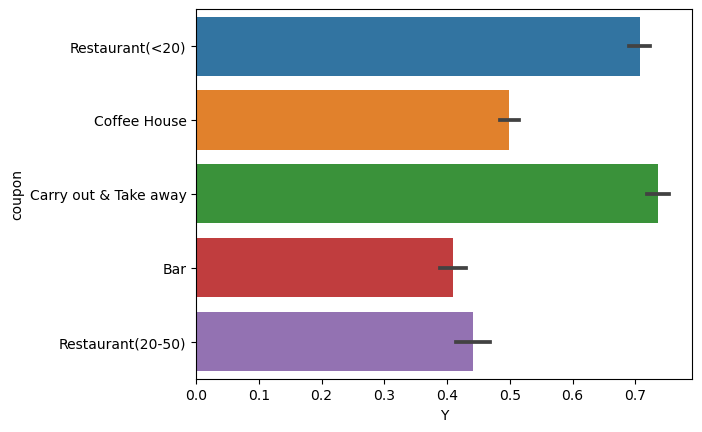

In [25]:
sns.barplot(data = df, x = 'Y', y = 'coupon')

6. Use a histogram to visualize the temperature column.

In [29]:
px.histogram(df["temperature"])

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [30]:
bar_coupons_df = df[df["coupon"] == "Bar"]
bar_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [32]:
bar_coupon_accepted_count = len(bar_coupons_df[bar_coupons_df["Y"]==1])
bar_coupon_total_count = len(bar_coupons_df)

bar_coupon_accepted_count / bar_coupon_total_count * 100

41.00148735746158

**41% of bar coupons were accepted**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [35]:
bar_coupons_df["Bar"].unique()

array(['never', 'less1', '1~3', 'gt8', 0, '4~8'], dtype=object)

In [139]:
bar_le_3x_month = bar_coupons_df.query("Bar == 'never' or Bar =='less1' or Bar =='1~3' or Bar == 0")
bar_le_3x_month

bar_le_3x_month_count = len(bar_le_3x_month[bar_le_3x_month["Y"]==1])
bar_le_3x_month_total_count = len(bar_le_3x_month)

bar_le_3x_month_count / bar_le_3x_month_total_count * 100

37.073707370737075

**Acceptance rate for those who went to a bar <= 3x/month is 37%**

In [140]:
bar_gt_3x_month = bar_coupons_df.query("Bar == 'gt8' or Bar == '4~8'")
bar_gt_3x_month

bar_gt_3x_month_count = len(bar_gt_3x_month[bar_gt_3x_month["Y"]==1])
bar_gt_3x_month_total_count = len(bar_gt_3x_month)

bar_gt_3x_month_count / bar_gt_3x_month_total_count * 100

76.88442211055276

**Acceptance rate for those who went to a bar > 3x/month is 76%, indicating that people who frequent the bar more are more likely to accept coupon**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [141]:
bar_gt_1x_month_and_25 = bar_coupons_df.query("Bar == 'gt8' or Bar == '4~8' or Bar == '1~3' and age >='25'")
bar_gt_1x_month_and_25 

bar_gt_1x_month_and_25_count = len(bar_gt_1x_month_and_25[bar_gt_1x_month_and_25["Y"]==1])
bar_gt_1x_month_and_25_total_count = len(bar_gt_1x_month_and_25)

bar_gt_1x_month_and_25_count / bar_gt_1x_month_and_25_total_count * 100

69.93865030674846

**The acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 to the all others is less than the acceptance rate for those who went to a bar > 3x/month and higher than those who go less frequently**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [74]:
bar_coupons_df["passanger"].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [85]:
bar_coupons_df["maritalStatus"].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [142]:
bar_gt_1x_month_and_friend_or_partner = bar_coupons_df.query("Bar == 'gt8' or Bar == '4~8' or Bar == '1~3' and passanger !='Kid(s)' and passanger !='Alone' and occupation !='Farming Fishing & Forestry'")
bar_gt_1x_month_and_friend_or_partner 

bar_gt_1x_month_and_friend_or_partner_count = len(bar_gt_1x_month_and_friend_or_partner[bar_gt_1x_month_and_friend_or_partner["Y"]==1])
bar_gt_1x_month_and_friend_or_partner_total_count = len(bar_gt_1x_month_and_friend_or_partner)

bar_gt_1x_month_and_friend_or_partner_count / bar_gt_1x_month_and_friend_or_partner_total_count * 100

75.0

**the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 75%**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [143]:
bar_gt_1x_month_and_friend_or_partner_not_widow = bar_coupons_df.query("Bar == 'gt8' or Bar == '4~8' or Bar == '1~3' and passanger !='Kid(s)' and passanger !='Alone' and maritalStatus !='Widowed'")
bar_gt_1x_month_and_friend_or_partner_not_widow 

bar_gt_1x_month_and_friend_or_partner_not_widow_count = len(bar_gt_1x_month_and_friend_or_partner_not_widow[bar_gt_1x_month_and_friend_or_partner_not_widow["Y"]==1])
bar_gt_1x_month_and_friend_or_partner_not_widow_total_count = len(bar_gt_1x_month_and_friend_or_partner_not_widow)

bar_gt_1x_month_and_friend_or_partner_not_widow_count / bar_gt_1x_month_and_friend_or_partner_not_widow_total_count * 100

75.0

**Acceptance rate for people who go to bars more than once a month, had passengers that were not a kid, and were not widowed is also 75%**

In [144]:
bar_gt_1x_month_and_under_30 = bar_coupons_df.query("Bar == 'gt8' or Bar == '4~8' or Bar == '1~3' and age <'30'")
bar_gt_1x_month_and_under_30 

bar_gt_1x_month_and_under_30_count = len(bar_gt_1x_month_and_under_30[bar_gt_1x_month_and_under_30["Y"]==1])
bar_gt_1x_month_and_under_30_total_count = len(bar_gt_1x_month_and_under_30)

bar_gt_1x_month_and_under_30_count / bar_gt_1x_month_and_under_30_total_count * 100

72.13930348258707

**Acceptance rate for people who go to bars more than once a month and under 30 is 72%**

In [145]:
cheap_restaurant_gt_4x_month_and_lt_50k = bar_coupons_df.query("RestaurantLessThan20 == 'gt8' or RestaurantLessThan20 == '4~8' and income == 'Less than $12500' or income =='$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999'")
cheap_restaurant_gt_4x_month_and_lt_50k 

cheap_restaurant_gt_4x_month_and_lt_50k_count = len(cheap_restaurant_gt_4x_month_and_lt_50k[cheap_restaurant_gt_4x_month_and_lt_50k["Y"]==1])
cheap_restaurant_gt_4x_month_and_lt_50k_total_count = len(cheap_restaurant_gt_4x_month_and_lt_50k)

cheap_restaurant_gt_4x_month_and_lt_50k_count / cheap_restaurant_gt_4x_month_and_lt_50k_total_count * 100

40.15444015444015

**Acceptance rate for people who go to cheap restaurants more than 4x a month and under 50k income is 40%**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Based on these observations, I hypothesize that drivers who are go to the bar at least 3x a month and are with a friend are the most likely to accept the bar coupons and should be targeted**

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the consumer type most likely to accept take out coupons**

In [113]:
carry_away_coupons_df = df[df["coupon"] == "Carry out & Take away"]
carry_away_coupons_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
19,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


**Portion of take out coupons accepted**

In [108]:
carry_away_coupons_count = len(carry_away_coupons_df[carry_away_coupons_df["Y"]==1])
carry_away_coupons_total_count = len(carry_away_coupons_df)

carry_away_coupons_count / carry_away_coupons_total_count * 100

73.54784788967822

**74% of takeout coupons were accepted**

In [126]:
to_le_3x_month = carry_away_coupons_df.query("CarryAway == 'never' or CarryAway =='less1' or CarryAway =='1~3' or CarryAway == 0")
to_le_3x_month

to_le_3x_month_count = len(to_le_3x_month[to_le_3x_month["Y"]==1])
to_le_3x_month_total_count = len(to_le_3x_month)

to_le_3x_month_count / to_le_3x_month_total_count * 100

72.30527143981116

**Acceptance rate for those who got take out <= 3x/month is 72%**

In [128]:
to_gt_3x_month = carry_away_coupons_df.query("CarryAway == 'gt8' or CarryAway == '4~8'")
to_gt_3x_month

to_gt_3x_month_count = len(to_gt_3x_month[to_gt_3x_month["Y"]==1])
to_gt_3x_month_total_count = len(to_gt_3x_month)

to_gt_3x_month_count / to_gt_3x_month_total_count * 100

74.9554367201426

**Acceptance rate for those who got take out > 3x/month is 75%, indicating that people who get take out more are more likely to accept coupon**

In [132]:
to_gt_1x_month_and_25 = carry_away_coupons_df.query("CarryAway == 'gt8' or CarryAway == '4~8' or CarryAway == '1~3' and age >='25'")
to_gt_1x_month_and_25 

to_gt_1x_month_and_25_count = len(to_gt_1x_month_and_25[to_gt_1x_month_and_25["Y"]==1])
to_gt_1x_month_and_25_total_count = len(to_gt_1x_month_and_25)

to_gt_1x_month_and_25_count / to_gt_1x_month_and_25_total_count * 100

74.70881863560732

**The acceptance rate for drivers who got takeout more than once a month and are over the age of 25 to the all others is the same as the acceptance rate for those who got takeout > 3x/month being 75% and higher than those who go less frequently**

In [134]:
to_gt_1x_month_and_friend_or_partner = carry_away_coupons_df.query("CarryAway == 'gt8' or CarryAway == '4~8' or CarryAway == '1~3' and passanger !='Kid(s)' and passanger !='Alone' and occupation !='Farming Fishing & Forestry'")
to_gt_1x_month_and_friend_or_partner 

to_gt_1x_month_and_friend_or_partner_count = len(to_gt_1x_month_and_friend_or_partner[to_gt_1x_month_and_friend_or_partner["Y"]==1])
to_gt_1x_month_and_friend_or_partner_total_count = len(to_gt_1x_month_and_friend_or_partner)

to_gt_1x_month_and_friend_or_partner_count / to_gt_1x_month_and_friend_or_partner_total_count * 100

75.38141470180305

**the acceptance rate between drivers who got takeout more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 75%**

In [136]:
to_gt_1x_month_and_friend_or_partner_not_widow = carry_away_coupons_df.query("CarryAway == 'gt8' or CarryAway == '4~8' or CarryAway == '1~3' and passanger !='Kid(s)' and passanger !='Alone' and maritalStatus !='Widowed'")
to_gt_1x_month_and_friend_or_partner_not_widow 

to_gt_1x_month_and_friend_or_partner_not_widow_count = len(to_gt_1x_month_and_friend_or_partner_not_widow[to_gt_1x_month_and_friend_or_partner_not_widow["Y"]==1])
to_gt_1x_month_and_friend_or_partner_not_widow_total_count = len(to_gt_1x_month_and_friend_or_partner_not_widow)

to_gt_1x_month_and_friend_or_partner_not_widow_count / to_gt_1x_month_and_friend_or_partner_not_widow_total_count * 100

75.41782729805014

**Acceptance rate for people who go to bars more than once a month, had passengers that were not a kid, and were not widowed is also 75%**

In [137]:
to_gt_1x_month_and_under_30 = carry_away_coupons_df.query("CarryAway == 'gt8' or CarryAway == '4~8' or CarryAway == '1~3' and age <'30'")
to_gt_1x_month_and_under_30 

to_gt_1x_month_and_under_30_count = len(to_gt_1x_month_and_under_30[to_gt_1x_month_and_under_30["Y"]==1])
to_gt_1x_month_and_under_30_total_count = len(to_gt_1x_month_and_under_30)

to_gt_1x_month_and_under_30_count / to_gt_1x_month_and_under_30_total_count * 100

74.49577098243331

**Acceptance rate for people who go to bars more than once a month and under 30 is 74%**

In [146]:
cheap_restaurant_gt_4x_month_and_lt_50k = carry_away_coupons_df.query("RestaurantLessThan20 == 'gt8' or RestaurantLessThan20 == '4~8' and income == 'Less than $12500' or income =='$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999'")
cheap_restaurant_gt_4x_month_and_lt_50k 

cheap_restaurant_gt_4x_month_and_lt_50k_count = len(cheap_restaurant_gt_4x_month_and_lt_50k[cheap_restaurant_gt_4x_month_and_lt_50k["Y"]==1])
cheap_restaurant_gt_4x_month_and_lt_50k_total_count = len(cheap_restaurant_gt_4x_month_and_lt_50k)

cheap_restaurant_gt_4x_month_and_lt_50k_count / cheap_restaurant_gt_4x_month_and_lt_50k_total_count * 100

75.17786561264822

**Acceptance rate for people who go to cheap restaurants more than 4x a month and under 50k income is 40%**

**Based on these observations, I hypothesize that drivers in nearly every category have a high likelyhood to accept the bar coupons. This could be because take out provides a lot of convenience to the customer and is minimally disruptive to their day.**